In [1]:
!pip3 install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.7 MB/s eta 0:00:001.6 MB/s eta 0:00:010m
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [2]:
!pip3 install --pre pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached pandas-2.1.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.1-py3-none-any.whl
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
  Using cached numba-0.60.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached xxhash-3.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached matplotlib-3.7.5-cp312-cp312-manylin

# Imports

In [1]:
from pycaret.regression import *
import pandas as pd

# Loading Dataset

In [2]:
features = pd.read_pickle("dataset/features.pickle")

In [3]:
features

,gender,age,weight,height,bmi,mean_s1,std_s1,mean_s2,std_s2,mean_s3,...,p25th,p75th,mad,iqr,skewness,kurtosis,shannons_entropy,spectral_entropy,dbp,sbp
0,1,26.0,89.05,183.9,26.3,1.076526,0.313683,4.706773,0.841947,-4.404761,...,0.098630,0.327531,0.050572,0.228901,1.453969,0.735555,9.639000,0.936943,57.966649,99.987120
1,1,26.0,89.05,183.9,26.3,0.920225,0.044189,4.833590,0.231575,-4.746126,...,0.108269,0.346271,0.051605,0.238002,1.406200,0.579485,9.675207,0.940462,58.320482,100.759058
2,1,26.0,89.05,183.9,26.3,0.979187,0.199704,4.698177,1.004998,-4.390863,...,0.097341,0.335279,0.057346,0.237938,1.431511,0.654294,9.677071,0.940644,59.022303,102.019124
3,1,26.0,89.05,183.9,26.3,0.901581,0.061005,4.691357,0.207623,-4.630416,...,0.084101,0.309944,0.056907,0.225843,1.479525,0.790173,9.609118,0.934038,59.802165,102.834648
4,1,26.0,89.05,183.9,26.3,0.917123,0.069391,4.727339,0.270923,-4.560423,...,0.112514,0.322766,0.052357,0.210252,1.471332,0.803923,9.706574,0.943511,58.068798,100.265742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1,51.0,81.60,186.0,23.6,2.684659,0.267099,2.803873,0.372967,-1.625934,...,0.181493,0.691405,0.196568,0.509912,0.412075,-1.291309,9.939783,0.966180,67.354875,158.041383
662,1,51.0,81.60,186.0,23.6,2.365345,0.443888,2.488603,0.302697,-1.450353,...,0.235724,0.657994,0.183673,0.422270,0.306945,-1.070424,10.054841,0.977364,66.764646,154.649431
663,1,51.0,81.60,186.0,23.6,2.512441,0.316811,2.609838,0.314200,-1.512684,...,0.187967,0.617998,0.176876,0.430031,0.440376,-1.091376,9.987454,0.970814,67.429088,160.446045
664,1,51.0,81.60,186.0,23.6,2.824505,0.326535,3.026811,0.345313,-1.568525,...,0.235560,0.684284,0.194875,0.448724,0.353602,-1.170171,10.011257,0.973128,69.336335,165.430557


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 76 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   666 non-null    category
 1   age                      666 non-null    float64 
 2   weight                   666 non-null    float64 
 3   height                   666 non-null    float64 
 4   bmi                      666 non-null    float64 
 5   mean_s1                  666 non-null    float64 
 6   std_s1                   666 non-null    float64 
 7   mean_s2                  666 non-null    float64 
 8   std_s2                   666 non-null    float64 
 9   mean_s3                  666 non-null    float64 
 10  std_s3                   666 non-null    float64 
 11  mean_s4                  666 non-null    float64 
 12  std_s4                   666 non-null    float64 
 13  mean_s5                  666 non-null    float64 
 14  std_s5    

# Models

In [5]:
reg = setup(
    data = features,
    target = "sbp",
    ignore_features = ["dbp"],
    categorical_features = ["gender"],
    normalize = True,
    n_jobs = 3
)
set_config("seed", 999) 

,Description,Value
0,Session id,2940
1,Target,sbp
2,Target type,Regression
3,Original data shape,"(666, 76)"
4,Transformed data shape,"(666, 75)"
5,Transformed train set shape,"(466, 75)"
6,Transformed test set shape,"(200, 75)"
7,Ignore features,1
8,Numeric features,73
9,Categorical features,1


In [6]:
import numpy as np

def std (y_true, y_pred):
    return np.std(y_true - y_pred)

add_metric("std", "STD", std, greater_is_better = False)

def mhs (y_test, y_pred, threshold):
    return np.sum(np.abs(y_test - y_pred.flatten()) <= threshold) / len(y_test)

add_metric("5mmHg", "5mmHg", mhs, greater_is_better = True, threshold = 5)
add_metric("10mmHg", "10mmHg", mhs, greater_is_better = True, threshold = 10)
add_metric("15mmHg", "15mmHg", mhs, greater_is_better = True, threshold = 15)

Name                                                            15mmHg
Display Name                                                    15mmHg
Score Function                        <function mhs at 0x7ea16b578900>
Scorer               make_scorer(mhs, response_method='predict', th...
Target                                                            pred
Args                                                 {'threshold': 15}
Greater is Better                                                 True
Custom                                                            True
Name: 15mmHg, dtype: object

In [7]:
best = compare_models(
    exclude = ["lar", "catboost"]
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,STD,5mmHg,10mmHg,15mmHg,TT (Sec)
et,Extra Trees Regressor,12.4369,275.2734,16.4728,0.7081,0.1233,0.0962,0.0000,0.0000,0.0000,0.0000,0.1270
lightgbm,Light Gradient Boosting Machine,12.8387,281.2992,16.6346,0.7011,0.1245,0.0995,0.0000,0.0000,0.0000,0.0000,0.0590
gbr,Gradient Boosting Regressor,13.1925,296.9054,17.0956,0.6838,0.1266,0.1015,0.0000,0.0000,0.0000,0.0000,0.3070
rf,Random Forest Regressor,13.7632,312.3678,17.5933,0.6699,0.1325,0.1070,0.0000,0.0000,0.0000,0.0000,0.2960
xgboost,Extreme Gradient Boosting,13.7812,320.7433,17.7607,0.6594,0.1334,0.1070,0.0000,0.0000,0.0000,0.0000,0.4050
ada,AdaBoost Regressor,16.3625,397.5554,19.8916,0.5862,0.1489,0.1271,0.0000,0.0000,0.0000,0.0000,0.1110
br,Bayesian Ridge,17.1346,449.3901,21.0504,0.5273,0.1580,0.1326,0.0000,0.0000,0.0000,0.0000,0.0280
lr,Linear Regression,16.8448,446.3240,20.8423,0.5211,0.1573,0.1293,0.0000,0.0000,0.0000,0.0000,0.1490
knn,K Neighbors Regressor,16.4880,461.8574,21.3712,0.5173,0.1578,0.1272,0.0000,0.0000,0.0000,0.0000,0.0200
ridge,Ridge Regression,17.2569,461.0486,21.2240,0.5120,0.1606,0.1335,0.0000,0.0000,0.0000,0.0000,0.0290


In [8]:
lightgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE,STD,5mmHg,10mmHg,15mmHg
Fold,,,,,,,,,,
0,11.4034,234.8140,15.3236,0.7824,0.1014,0.0762,-0.0000,0.0000,0.0000,0.0000
1,12.7534,233.2543,15.2727,0.7870,0.1255,0.1063,-0.0000,0.0000,0.0000,0.0000
2,13.0484,259.8777,16.1207,0.7113,0.1201,0.0976,-0.0000,0.0000,0.0000,0.0000
3,13.5340,310.6695,17.6258,0.6772,0.1246,0.1000,-0.0000,0.0000,0.0000,0.0000
4,11.2338,189.9995,13.7840,0.7853,0.1018,0.0862,-0.0000,0.0000,0.0000,0.0000
5,14.2553,330.0149,18.1663,0.6806,0.1447,0.1194,-0.0000,0.0000,0.0000,0.0000
6,15.3074,443.9474,21.0701,0.4214,0.1541,0.1222,-0.0000,0.0000,0.0000,0.0000
7,12.6915,328.8877,18.1353,0.5982,0.1439,0.1027,-0.0000,0.0000,0.0000,0.0000
8,12.7845,293.0862,17.1198,0.7239,0.1248,0.0965,-0.0000,0.0000,0.0000,0.0000


In [9]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = {"n_estimators": [1000]})

,MAE,MSE,RMSE,R2,RMSLE,MAPE,STD,5mmHg,10mmHg,15mmHg
Fold,,,,,,,,,,
0,11.4460,232.1084,15.2351,0.7849,0.1017,0.0769,-0.0000,0.0000,0.0000,0.0000
1,12.2903,218.6401,14.7865,0.8003,0.1215,0.1024,-0.0000,0.0000,0.0000,0.0000
2,12.9680,254.3028,15.9469,0.7175,0.1190,0.0970,-0.0000,0.0000,0.0000,0.0000
3,13.5063,310.1061,17.6098,0.6778,0.1240,0.0996,-0.0000,0.0000,0.0000,0.0000
4,11.1510,187.3485,13.6875,0.7883,0.1012,0.0857,-0.0000,0.0000,0.0000,0.0000
5,14.0053,318.6344,17.8503,0.6916,0.1423,0.1174,-0.0000,0.0000,0.0000,0.0000
6,15.0937,434.1252,20.8357,0.4342,0.1530,0.1206,-0.0000,0.0000,0.0000,0.0000
7,12.8297,326.5745,18.0714,0.6011,0.1435,0.1039,-0.0000,0.0000,0.0000,0.0000
8,12.6428,289.6993,17.0206,0.7271,0.1239,0.0951,-0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [11]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

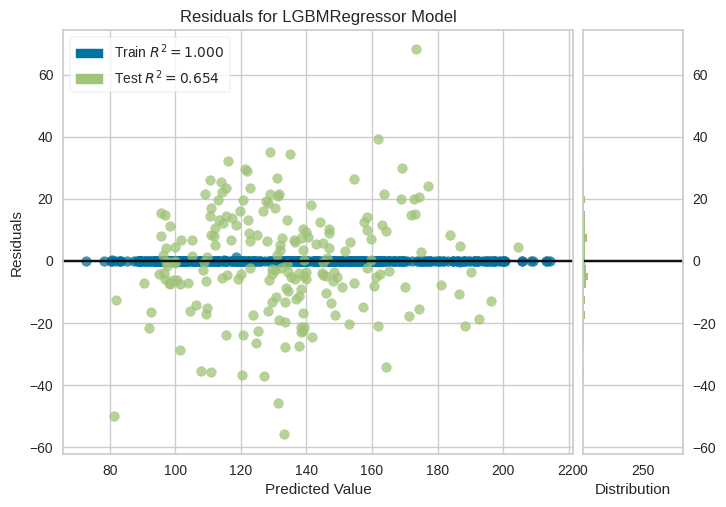

In [12]:
plot_model(tuned_lightgbm, plot = "residuals")

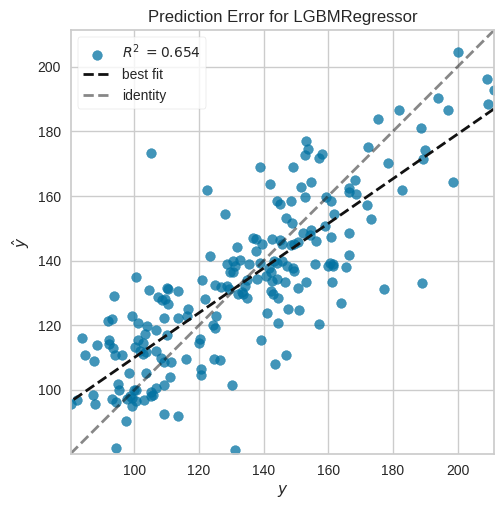

In [20]:
plot_model(tuned_lightgbm, plot = "error")

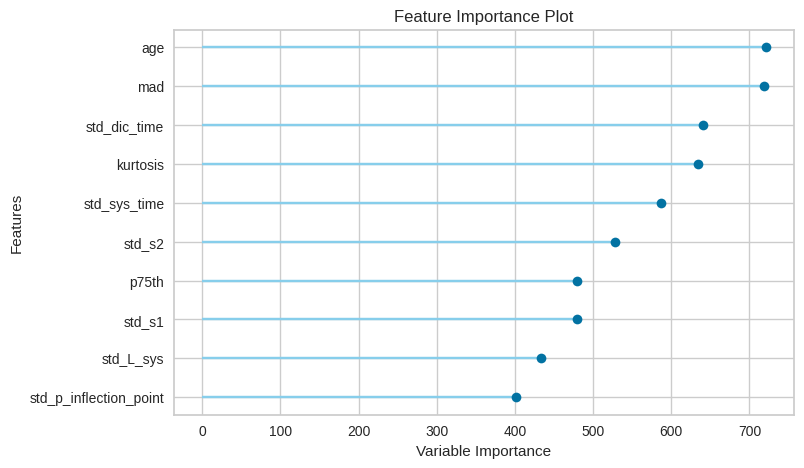

In [19]:
plot_model(tuned_lightgbm, plot = "feature")

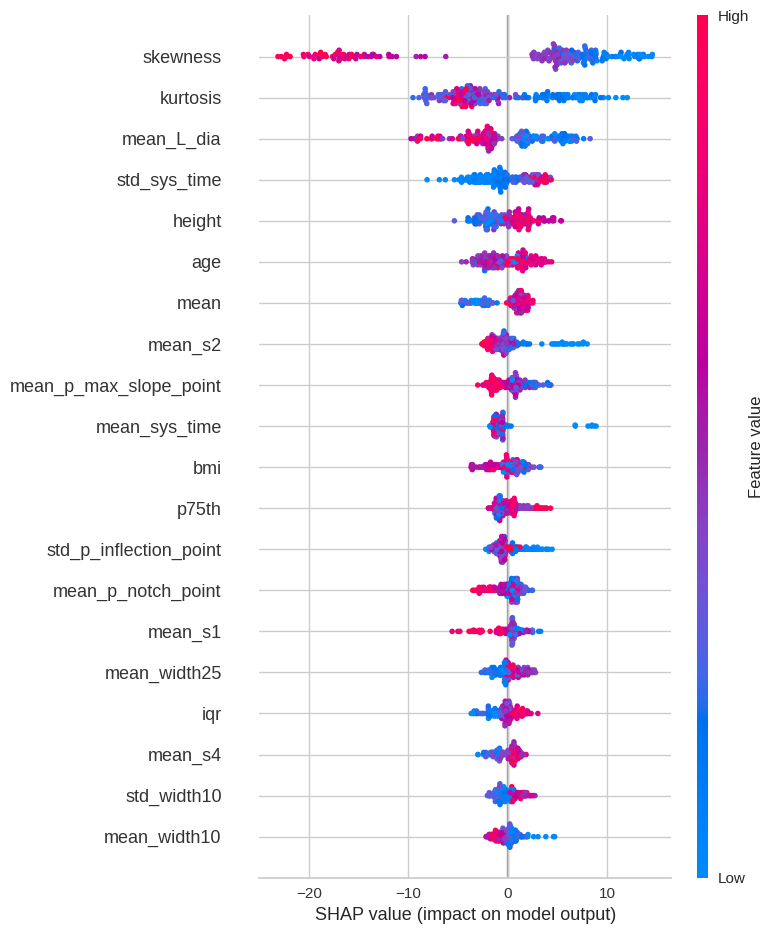

In [18]:
interpret_model(tuned_lightgbm)

In [16]:
interpret_model(tuned_lightgbm, plot = "reason")

In [17]:
interpret_model(tuned_lightgbm, plot = "reason", observation = 1)